In [178]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage.segmentation import active_contour
from skimage.filters import gaussian
from skimage.segmentation import morphological_geodesic_active_contour, disk_level_set

def boundary(array):
    bound = np.zeros_like(array)
    bound[:,:-1][array[:,1:]!=array[:,:-1]] = 1
    bound[:-1,:][array[1:, :]!=array[:-1,:]] = 1
    return bound


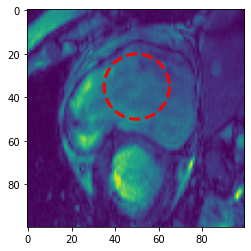

In [180]:
im = np.array(Image.open('figs/ref.png'))[:,:,:3].mean(2)[50:150, 80:180]/255.0

s = np.linspace(0, 2*np.pi, 400)
radius = 15
center = (35,50)
r = center[0] + radius*np.sin(s)
c = center[1] + radius*np.cos(s)
init = np.array([r, c]).T
cirle_init_array = disk_level_set(im.shape, center=center, radius=radius)

plt.plot(init[:, 1], init[:, 0], '--r', lw=3)

plt.imshow(im)



# Active Contours

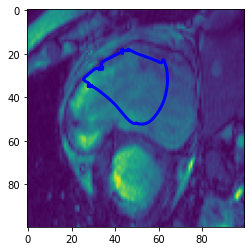

In [208]:
snake = active_contour(im,init, alpha=0.001, beta=0.4,w_edge=1.5)
plt.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
plt.imshow(im)

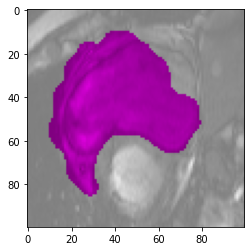

In [210]:
snake = morphological_geodesic_active_contour(im**2, 100, cirle_init_array,balloon=0.2,smoothing=2,)
plt.plot(snake[:, 1], snake[:, 0], '-b', lw=3)


im2 = 0.5*np.repeat(im[:,:,None], 3, axis=2)+0.5
im2[:,:,1] *= 1-snake*1.0
plt.imshow(im2)

In [93]:
snake.max()

1